In [40]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def markov_blanket(adj_matrix, var_idx):
    parents = np.where(adj_matrix[:, var_idx])[0]
    children = np.where(adj_matrix[var_idx])[0]
    
    spouses = set()
    for c in children:
        for sp in np.where(adj_matrix[:, c])[0]:
            spouses.add(sp)
    
    spouses = list(spouses)
    return parents, children, spouses


def plot_graph_from_adjacency_matrix(adj_matrix, examine_idx=-1):
    # Create a directed graph from the adjacency matrix
    G = nx.DiGraph(adj_matrix)
    
    # Draw the graph
    pos = nx.shell_layout(G)
    if examine_idx == -1:
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', font_size=12, font_weight='bold')
    else:
        pa, ch, sp = markov_blanket(adj_matrix, examine_idx)
        color_map = []
        for node in G:
            if node == examine_idx:
                color_map.append('red')
            elif node in pa:
                color_map.append('green')
            elif node in ch:
                color_map.append('pink')
            elif node in sp: 
                color_map.append('orange')
            else:
                color_map.append('skyblue')
        
        nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=500, edge_color='gray', font_size=12, font_weight='bold')
    
    plt.show()

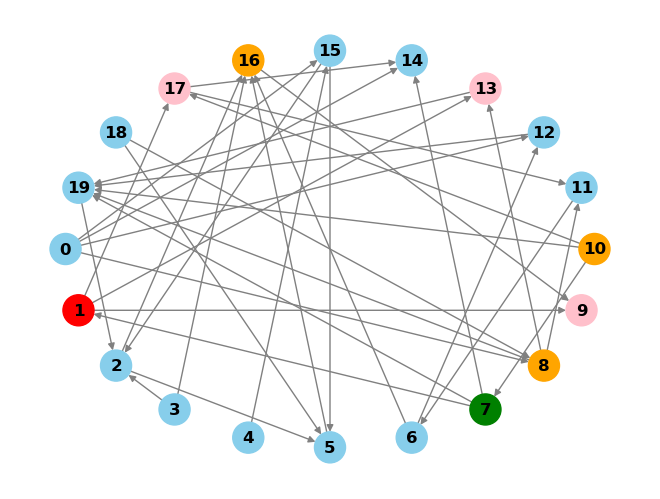

In [42]:
adj_matrix = np.loadtxt("distributed/erdos_renyi/d20_p0.11/adj.txt", delimiter=' ')

plot_graph_from_adjacency_matrix(adj_matrix, 1)

In [30]:
pa, ch, sp = markov_blanket(adj_matrix, 0)

In [31]:
pa

array([], dtype=int64)

In [ ]:
ch